In [2]:
import pandas as pd
url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
data = pd.read_csv(url,sep=",")

In [3]:
#Training and Test set
#We will be using 10 years of data for training i.e. 2006–2016 and last year’s data for testing i.e. 2017.
data


,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [90]:
# to explicitly convert the date column to type DATETIME
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [91]:
#We will now go ahead and set this column as the index for the dataframe using the set_index() call.

data = data.set_index('Date')
data.dtypes

Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [7]:
data.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [93]:
data_freq = data.asfreq('D')
data_freq
# Note: Available frequencies in pandas include hourly (‘H’), 
# calendar daily (‘D’), business daily (‘B’), weekly (‘W’), 
# monthly (‘M’), quarterly (‘Q’), annual (‘A’), and many others.

data_freq = data.asfreq('D', method = 'ffill')
data_freq
#ffill refers to forward fill. This means when a null is encountered for 
# a particular column, it will be replaced by the value in the previous row

#Similarly, filling missing data in a time-series dataset can be achieved as follows:
#data = data.ffill().head()

# what if i'm missing a day, instead of there being a day but NaN?


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [9]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
data_7d_rol = data[data_columns].rolling(window = 7, center = True).mean()
data_7d_rol
data_365d_rol = data[data_columns].rolling(window = 365, center = True).mean()


Text(0.5, 1.0, 'Trends in Electricity Consumption')

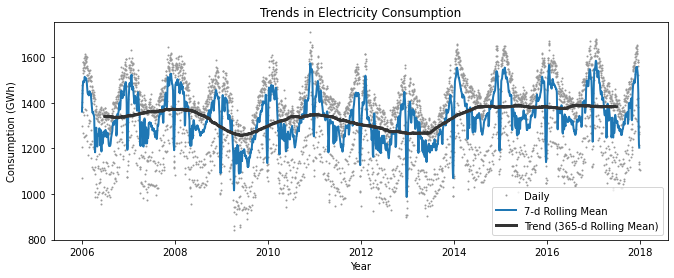

In [10]:
import matplotlib.pyplot as plt
#import matplotlib


fig, ax = plt.subplots(figsize = (11,4))
# plotting daily data
ax.plot(data['Consumption'], marker='.', markersize=2, color='0.6',linestyle='None', label='Daily')
# plotting 7-day rolling data
ax.plot(data_7d_rol['Consumption'], linewidth=2, label='7-d Rolling Mean')
# plotting annual rolling data
ax.plot(data_365d_rol['Consumption'], color='0.2', linewidth=3, label='Trend (365-d Rolling Mean)')
# Beautification of plot
#ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')

De-trending time series

Sometimes it would be beneficial to remove the trend from our data, especially if it is quite pronounced (as seen in Fig 3), so we can assess the seasonal variation (more on this in a few minutes) or the noise in our time series. Removing the trend (or de-trending) can also simplify the modeling process and improve model performance.

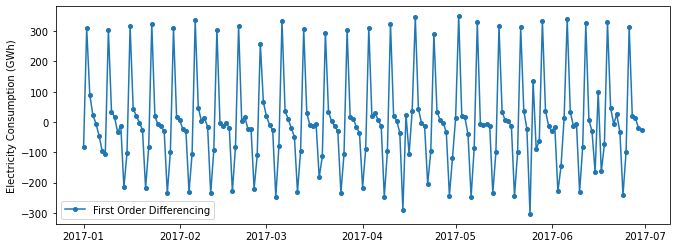

In [11]:
#We can remove the trend by using a method known as differencing. It essentially means creating a new time series wherein 
#value at time (t)= original value at time (t) - original value at time (t-1)

#Differencing is super helpful in turning your time series into a stationary time series.
#Python code for differencing

#To create first-order differencing of time series:

# creating the first order differencing data
# so this shows the difference in values from previous day instead of actualy values
data_first_order_diff = data[data_columns].diff()
start, end = '2017-01', '2017-06'

fig, ax = plt.subplots(figsize=(11, 4))

ax.plot(data_first_order_diff.loc[start:end, 'Consumption'], marker='o', markersize=4, linestyle='-', label='First Order Differencing')
ax.set_ylabel('Electricity Consumption (GWh)')
ax.legend()
# no trend here

Seasonality (or Periodicity)
A time series is periodic if it repeats itself at equally spaced intervals, say, every 12 months, every 1 week, every 4 months, and so on.

<AxesSubplot:xlabel='Date'>

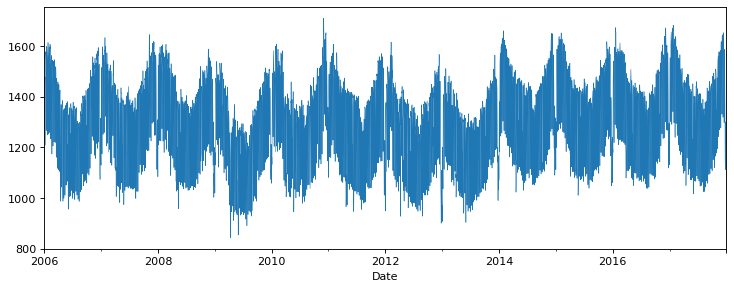

In [12]:
plt.figure(figsize=(11,4), dpi= 80)
data['Consumption'].plot(linewidth = 0.5)

<AxesSubplot:xlabel='Date'>

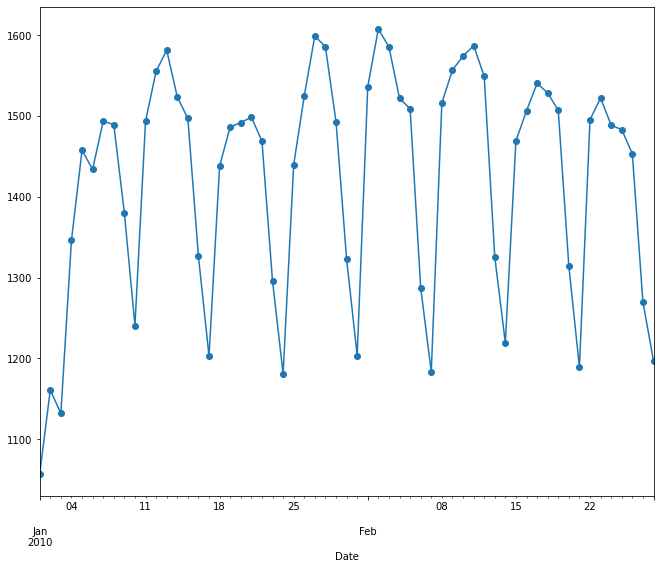

In [13]:
#We can look in-depth into a particular year to see if there is any weekly seasonality.
#Here we look at two month’s worth of data: Jan 2010 & Feb 2010:
data.loc['2010-01': '2010-02','Consumption'].plot(marker = 'o', figsize=(11, 9))

Autocorrelation
Autocorrelation is a technique for analyzing seasonality. It plots the correlation of the time series with itself at a different time lag.
Confusing much?
I learned a great intuitive way to understand autocorrelation using the tutorial here. It basically says, if you take a time series and move it by 12 months (lag = 12) backwards or forwards, it would map onto itself in some way. Autocorrelation is a way of telling how good this mapping is. If it is very good, it means the time series and the shifted time series are almost similar and the correlation at that time lag would be high. The correlation of a time series with such a shifted version of itself is captured by the concept of autocorrelation

From the plot, we can see there is a high peak in correlation at the lag of 7th day, then again on the 14th day, and so on. Which means the time series repeats every 7 days i.e. weekly. This pattern wears off after 3 months (100 days approximately). As you move further away, there’s less and less of a correlation.

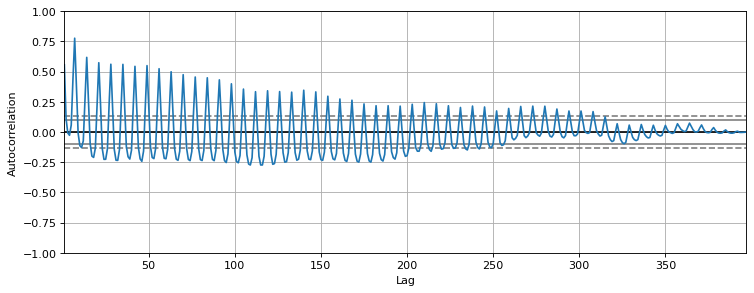

In [14]:
plt.figure(figsize=(11,4), dpi= 80)
pd.plotting.autocorrelation_plot(data.loc['2012-01': '2013-01', 'Consumption']);
# highest autocorrelation means this pattern repeats every 7 days



In [15]:
# Extract the year, month, date separately using the index set
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Weekday_Name'] = data.index.day_name()

In [16]:
data

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday_Name
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,Thursday
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday


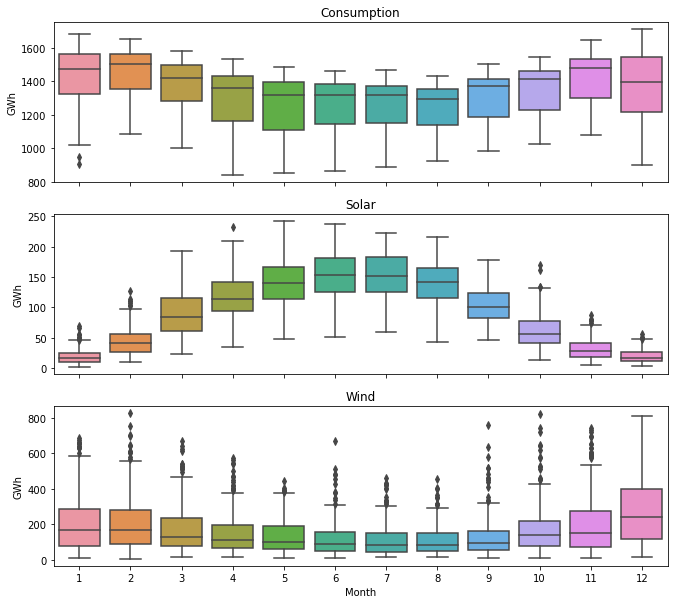

In [17]:
# the median power consumption for each month.

import seaborn as sns
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=data, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    # Keep the x-axis label for only the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

There are other, undoubtedly better, packages available for time series forecastings, such as ARIMA or Facebook’s proprietory software Prophet. However, this article was inspired by a friend’s take-home assignment that required her to use only Scikit, Numpy, and Pandas (or face instant disqualification!)

In [18]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):# Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [19]:
# creating new dataframe from consumption column
data_consumption = data[['Consumption']]
# inserting new column with yesterday's consumption values
data_consumption.loc[:,'Yesterday'] = data_consumption.loc[:,'Consumption'].shift()
# inserting another column with difference between yesterday and day before yesterday's consumption values.
data_consumption.loc[:,'Yesterday_Diff'] = data_consumption.loc[:,'Yesterday'].diff()
# dropping NAs
data_consumption = data_consumption.dropna()

/Users/vitaliystepanov/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/vitaliystepanov/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [20]:
data_consumption

,Consumption,Yesterday,Yesterday_Diff
Date,,,
2006-01-03,1442.53300,1380.52100,311.33700
2006-01-04,1457.21700,1442.53300,62.01200
2006-01-05,1477.13100,1457.21700,14.68400
2006-01-06,1403.42700,1477.13100,19.91400
2006-01-07,1300.28700,1403.42700,-73.70400
...,...,...,...
2017-12-27,1263.94091,1130.11683,18.83345
2017-12-28,1299.86398,1263.94091,133.82408
2017-12-29,1295.08753,1299.86398,35.92307


In [21]:
#Training and Test set
#We will be using 10 years of data for training i.e. 2006–2016 and last year’s data for testing i.e. 2017.

X_train = data_consumption[:'2016'].drop(['Consumption'], axis = 1)
y_train = data_consumption.loc[:'2016', 'Consumption']
X_test = data_consumption['2017'].drop(['Consumption'], axis = 1)
y_test = data_consumption.loc['2017', 'Consumption']

LR: 0.343747 (0.029773)


/Users/vitaliystepanov/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/vitaliystepanov/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/vitaliystepanov/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWa

NN: 0.496540 (0.147854)
KNN: 0.646307 (0.083185)
RF: 0.605185 (0.083367)
SVR: -0.117944 (0.157755)


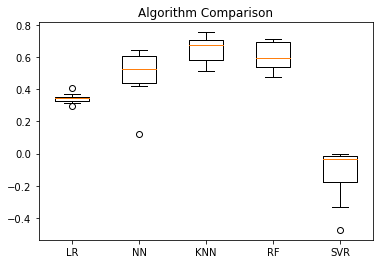

In [23]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=10)
    
    cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [28]:
import numpy as np

from sklearn.metrics import make_scorer
def rmse(actual, predict):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score
rmse_score = make_scorer(rmse, greater_is_better = False)


from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}
tscv = TimeSeriesSplit(n_splits=10)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = rmse_score)
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

In [29]:
# takes a few minutes to run
# y_true = y_test.values
# y_pred = best_model.predict(X_test)
# regression_results(y_true, y_pred)

# results
#explained_variance:  0.7295
#mean_squared_log_error:  0.0041
#r2:  0.7266
#MAE:  56.1769
#MSE:  7404.8856
#RMSE:  86.0516

explained_variance:  0.7295
mean_squared_log_error:  0.0041
r2:  0.7266
MAE:  56.1769
MSE:  7404.8856
RMSE:  86.0516


In [30]:
# creating copy of original dataframe
data_consumption_2o = data_consumption.copy()
# inserting column with yesterday-1 values
data_consumption_2o['Yesterday-1'] = data_consumption_2o['Yesterday'].shift()
# inserting column with difference in yesterday-1 and yesterday-2 values.
data_consumption_2o['Yesterday-1_Diff'] = data_consumption_2o['Yesterday-1'].diff()
# dropping NAs
data_consumption_2o = data_consumption_2o.dropna()

In [31]:
data_consumption_2o

,Consumption,Yesterday,Yesterday_Diff,Yesterday-1,Yesterday-1_Diff
Date,,,,,
2006-01-05,1477.13100,1457.21700,14.68400,1442.53300,62.01200
2006-01-06,1403.42700,1477.13100,19.91400,1457.21700,14.68400
2006-01-07,1300.28700,1403.42700,-73.70400,1477.13100,19.91400
2006-01-08,1207.98500,1300.28700,-103.14000,1403.42700,-73.70400
2006-01-09,1529.32300,1207.98500,-92.30200,1300.28700,-103.14000
...,...,...,...,...,...
2017-12-27,1263.94091,1130.11683,18.83345,1111.28338,-30.47392
2017-12-28,1299.86398,1263.94091,133.82408,1130.11683,18.83345
2017-12-29,1295.08753,1299.86398,35.92307,1263.94091,133.82408


In [69]:
X_train_2o = data_consumption_2o[:'2016'].drop(['Consumption'], axis = 1)
y_train_2o = data_consumption_2o.loc[:'2016', 'Consumption']
X_test = data_consumption_2o['2017'].drop(['Consumption'], axis = 1)
y_test = data_consumption_2o.loc['2017', 'Consumption']



,Consumption,Yesterday,Yesterday_Diff,Yesterday-1,Yesterday-1_Diff
Date,,,,,
2006-01-05,1477.13100,1457.21700,14.68400,1442.53300,62.01200
2006-01-06,1403.42700,1477.13100,19.91400,1457.21700,14.68400
2006-01-07,1300.28700,1403.42700,-73.70400,1477.13100,19.91400
2006-01-08,1207.98500,1300.28700,-103.14000,1403.42700,-73.70400
2006-01-09,1529.32300,1207.98500,-92.30200,1300.28700,-103.14000
...,...,...,...,...,...
2017-12-27,1263.94091,1130.11683,18.83345,1111.28338,-30.47392
2017-12-28,1299.86398,1263.94091,133.82408,1130.11683,18.83345
2017-12-29,1295.08753,1299.86398,35.92307,1263.94091,133.82408


In [33]:
model = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}
tscv = TimeSeriesSplit(n_splits=10)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = rmse_score)
gsearch.fit(X_train_2o, y_train_2o)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_
y_true = y_test.values
y_pred = best_model.predict(X_test)
regression_results(y_true, y_pred)

explained_variance:  0.8425
mean_squared_log_error:  0.0024
r2:  0.8425
MAE:  40.3446
MSE:  4265.0956
RMSE:  65.3077


In [62]:
data_consumption_2o_solar = data_consumption_2o.join(data[['Solar']])
data_consumption_2o_solar = data_consumption_2o_solar.dropna()
# removed 2006 to 2012 because of dropna()!!!!

In [63]:
data_consumption_2o_solar

,Consumption,Yesterday,Yesterday_Diff,Yesterday-1,Yesterday-1_Diff,Solar
Date,,,,,,
2012-01-01,948.12800,1077.62500,-122.24100,1199.86600,-27.02200,6.587
2012-01-02,1269.58100,948.12800,-129.49700,1077.62500,-122.24100,6.574
2012-01-03,1334.74500,1269.58100,321.45300,948.12800,-129.49700,24.679
2012-01-04,1347.13600,1334.74500,65.16400,1269.58100,321.45300,14.681
2012-01-05,1376.65800,1347.13600,12.39100,1334.74500,65.16400,5.071
...,...,...,...,...,...,...
2017-12-27,1263.94091,1130.11683,18.83345,1111.28338,-30.47392,16.530
2017-12-28,1299.86398,1263.94091,133.82408,1130.11683,18.83345,14.162
2017-12-29,1295.08753,1299.86398,35.92307,1263.94091,133.82408,29.854


In [75]:
X_train_2o_solar = data_consumption_2o_solar[:'2016'].drop(['Consumption'], axis = 1)
y_train_2o_solar = data_consumption_2o_solar.loc[:'2016', 'Consumption']

X_test = data_consumption_2o_solar['2017'].drop(['Consumption'], axis = 1)
y_test = data_consumption_2o_solar.loc['2017', 'Consumption']



In [36]:

model = RandomForestRegressor()

param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}
tscv = TimeSeriesSplit(n_splits=5)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = rmse_score)
gsearch.fit(X_train_2o_solar, y_train_2o_solar)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_
y_true = y_test.values
y_pred = best_model.predict(X_test)
regression_results(y_true, y_pred)

# results take a few minutes to run
# explained_variance:  0.8449
# mean_squared_log_error:  0.0024
# r2:  0.8448
# MAE:  38.3032
# MSE:  4202.4648
# RMSE:  64.8264

explained_variance:  0.8449
mean_squared_log_error:  0.0024
r2:  0.8448
MAE:  38.3032
MSE:  4202.4648
RMSE:  64.8264


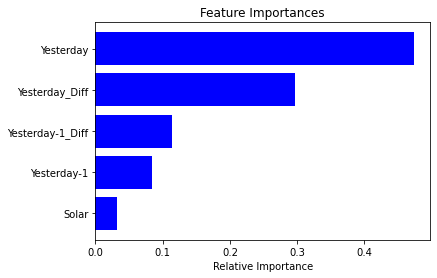

In [37]:
imp = best_model.feature_importances_
features = X_train_2o_solar.columns
indices = np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

 dataset has some seasonal element to it, weekly seasonality to be more precise. Thus, it would make more sense to feed as input to the model, consumption value in the week prior to the given date. That means, if the model is trying to predict the consumption value on Jan 8, it must be fed information about the consumption on Jan 1.

In [38]:
data_consumption_2o_solar_weeklyShift = data_consumption_2o_solar.copy()
data_consumption_2o_solar_weeklyShift['Last_Week'] = data_consumption_2o_solar['Consumption'].shift(7)
data_consumption_2o_solar_weeklyShift = data_consumption_2o_solar_weeklyShift.dropna()

In [52]:
data_consumption_2o_solar_weeklyShift.head(7)
# predicted should be start of 2017, train is 2006 to 2016
# why is 2012 output?

,Consumption,Yesterday,Yesterday_Diff,Yesterday-1,Yesterday-1_Diff,Solar,Last_Week
Date,,,,,,,
2012-01-08,1103.383,1175.688,-115.527,1291.215,-85.443,8.440,948.128
2012-01-09,1443.371,1103.383,-72.305,1175.688,-115.527,5.264,1269.581
2012-01-10,1434.631,1443.371,339.988,1103.383,-72.305,17.827,1334.745
2012-01-11,1449.768,1434.631,-8.740,1443.371,339.988,10.849,1347.136
2012-01-12,1442.448,1449.768,15.137,1434.631,-8.740,18.023,1376.658
2012-01-13,1403.402,1442.448,-7.320,1449.768,15.137,18.778,1291.215
2012-01-14,1203.165,1403.402,-39.046,1442.448,-7.320,26.772,1175.688


Actual data
2017-01-01	1130.41300	307.125	35.291	342.416	2017	1	Sunday
2017-01-02	1441.05200	295.099	12.479	307.578	2017	1	Monday
2017-01-03	1529.99000	666.173	9.351	675.524	2017	1	Tuesday
2017-01-04	1553.08300	686.578	12.814	699.392	2017	1	Wednesday
2017-01-05	1547.23800	261.758	20.797	282.555	2017	1	Thursday

In [46]:
X_train_2o_solar_weeklyShift = data_consumption_2o_solar_weeklyShift[:'2016'].drop(['Consumption'], axis = 1)
y_train_2o_solar_weeklyShift = data_consumption_2o_solar_weeklyShift.loc[:'2016', 'Consumption']
X_test = data_consumption_2o_solar_weeklyShift['2017'].drop(['Consumption'], axis = 1)
y_test = data_consumption_2o_solar_weeklyShift.loc['2017', 'Consumption']
model = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}
tscv = TimeSeriesSplit(n_splits=10)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = rmse_score)
gsearch.fit(X_train_2o_solar_weeklyShift, y_train_2o_solar_weeklyShift)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_
y_true = y_test.values
y_pred = best_model.predict(X_test)
regression_results(y_true, y_pred)


# results take a few minutes to run:
# explained_variance:  0.8901
# mean_squared_log_error:  0.0017
# r2:  0.8895
# MAE:  31.8113
# MSE:  2991.5181
# RMSE:  54.6948

explained_variance:  0.8901
mean_squared_log_error:  0.0017
r2:  0.8895
MAE:  31.8113
MSE:  2991.5181
RMSE:  54.6948


In [84]:
# drop the consumption colum but feed in the date
# don't need other columns?
X_test

,Yesterday,Yesterday_Diff,Yesterday-1,Yesterday-1_Diff,Solar
Date,,,,,
2017-01-01,1212.56800,-78.47600,1291.04400,-4.85300,35.291
2017-01-02,1130.41300,-82.15500,1212.56800,-78.47600,12.479
2017-01-03,1441.05200,310.63900,1130.41300,-82.15500,9.351
2017-01-04,1529.99000,88.93800,1441.05200,310.63900,12.814
2017-01-05,1553.08300,23.09300,1529.99000,88.93800,20.797
...,...,...,...,...,...
2017-12-27,1130.11683,18.83345,1111.28338,-30.47392,16.530
2017-12-28,1263.94091,133.82408,1130.11683,18.83345,14.162
2017-12-29,1299.86398,35.92307,1263.94091,133.82408,29.854


In [83]:
y_pred

array([1134.74147284, 1193.40773771, 1448.80967455, 1489.14448167,
       1480.03160625, 1386.24052339, 1271.895008  , 1235.12454091,
       1341.7031656 , 1600.29071717, 1633.736365  , 1618.38569   ,
       1501.86638   , 1432.5827625 , 1283.42963703, 1600.52279229,
       1623.22682167, 1649.03679   , 1641.76257348, 1631.47405198,
       1408.39874226, 1287.54724   , 1579.75929455, 1637.5205    ,
       1638.78318   , 1612.33199333, 1579.37154   , 1418.24125455,
       1273.26793167, 1590.51923583, 1619.95849833, 1621.16959222,
       1612.74536522, 1576.85607657, 1365.45011337, 1253.65578121,
       1557.16365093, 1602.48719533, 1627.82366583, 1621.05141387,
       1620.93054211, 1404.50078831, 1269.96186214, 1559.3308365 ,
       1582.7596    , 1574.92401965, 1554.48803667, 1562.61764761,
       1351.2619189 , 1236.33521521, 1560.22855506, 1589.62940522,
       1556.67089604, 1571.04535742, 1523.71404761, 1322.79613615,
       1217.25525852, 1505.56802432, 1497.23902725, 1548.70632